In [257]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [258]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [259]:
mask = df['route']<=3.5

In [260]:
df_rest1 = df[mask]

In [261]:
df_rest1.shape

(4132, 13)

In [262]:
pd.value_counts(df_rest1["Deck"])

7.0    2326
6.0    1447
5.0     355
2.0       1
4.0       1
1.0       1
3.0       1
Name: Deck, dtype: int64

In [263]:
df_rest = df_rest1[df_rest1["Deck"]>4.0]

In [264]:
pd.value_counts(df_rest1["Deck"])

7.0    2326
6.0    1447
5.0     355
2.0       1
4.0       1
1.0       1
3.0       1
Name: Deck, dtype: int64

In [265]:
df_rest.drop("VIP",axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [266]:
mask1 = (df_rest['CryoSleep']==0)&(df_rest['Age']>12.5)
df1 = df_rest[mask1]
df1.shape

(2525, 12)

In [267]:
df1.drop("CryoSleep",axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [268]:
mask2 = df_rest['CryoSleep']==1
df2 = df_rest[mask2]
df2.shape

(1345, 12)

In [269]:
df2.drop(["CryoSleep","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [270]:
mask3 = (df_rest['CryoSleep'] == 0) & (df_rest['Age']<=12.5)
df3 = df_rest[mask3]

In [271]:
df3.drop(["CryoSleep","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


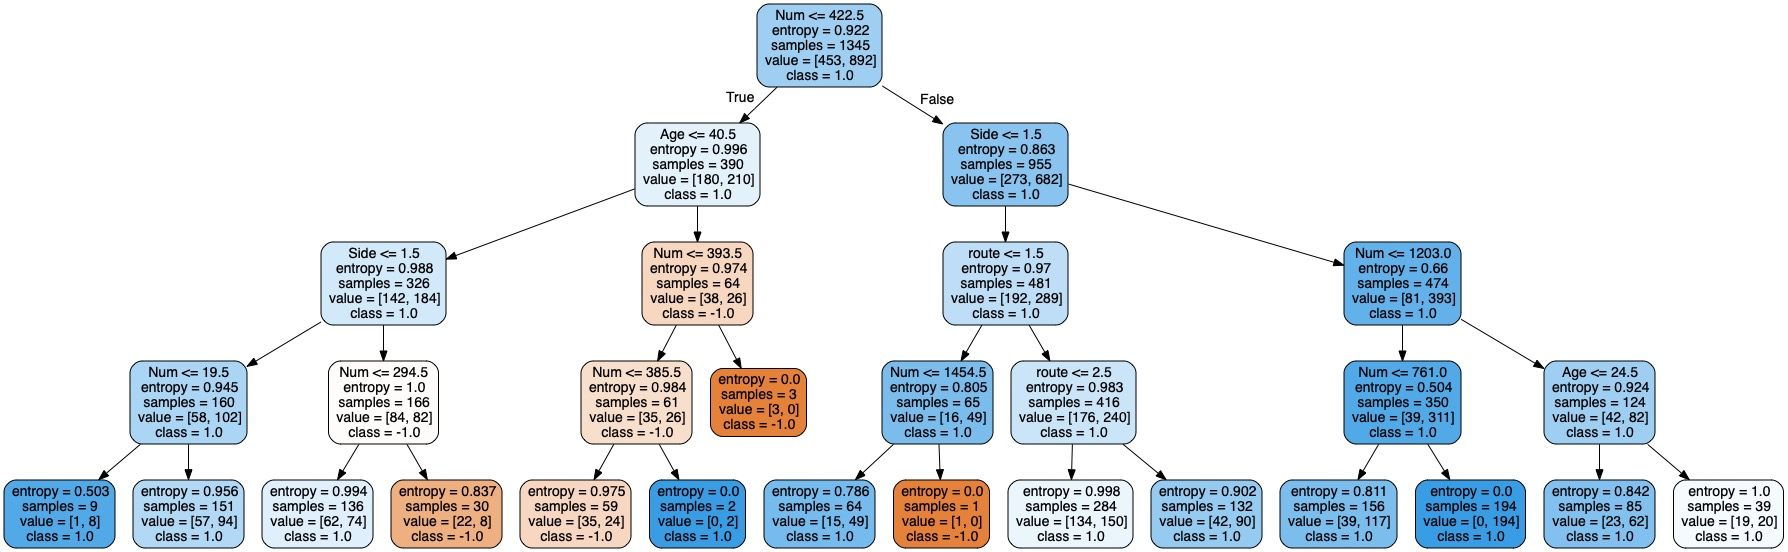

test size:  1345 , total errors in test: 31.52%
index = predicted, columns = factual, in %:
         -1        1
-1  4.53532  2.37918
 1   29.145  63.9405


In [272]:
features = ['Age','Deck','Num','Side','route']
tree = ds.divide_frame(dataf = df2,columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 1,random_state_ppn = 1, fraction = 1)

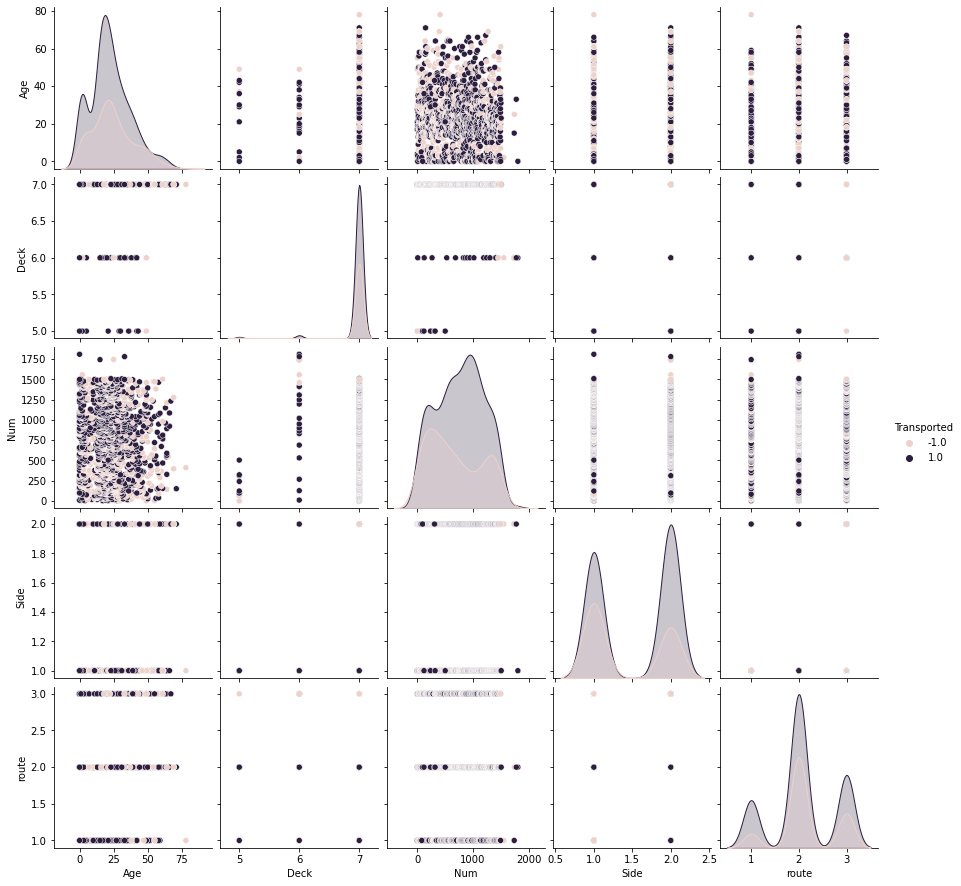

In [273]:
sb.pairplot(df2,hue="Transported")

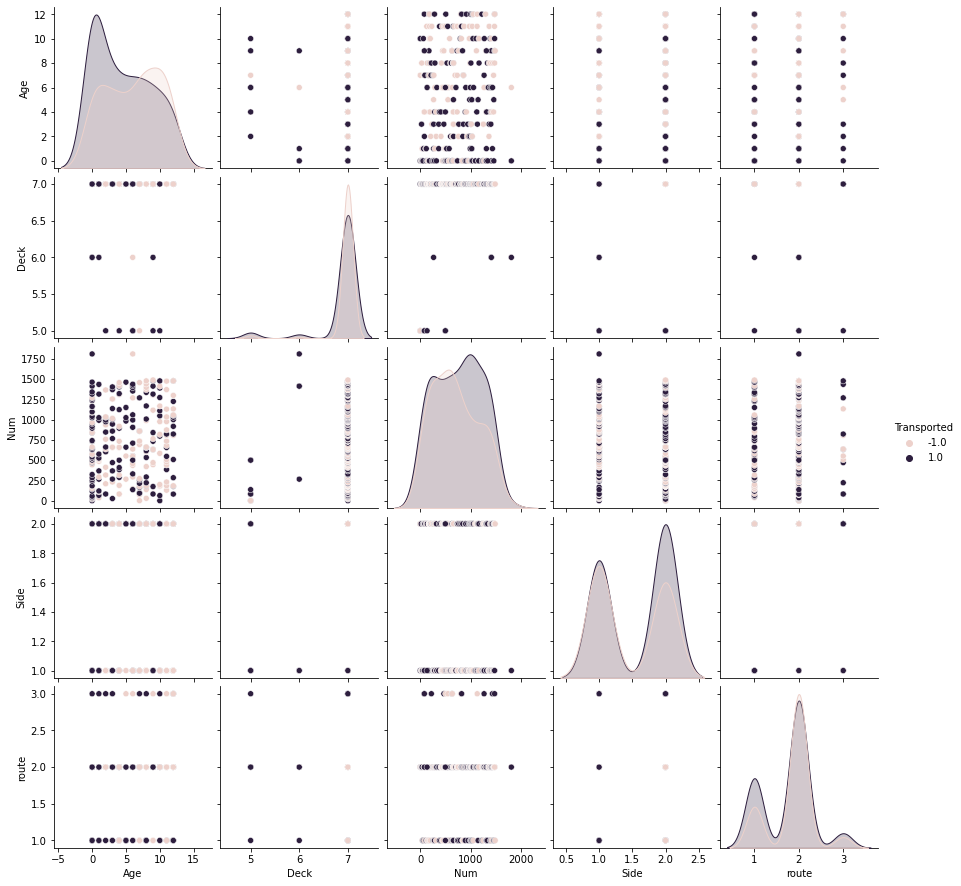

In [274]:
sb.pairplot(df3,hue="Transported")

In [275]:
features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = df1["Transported"]
X = df1[features]
X_std = sc.fit_transform(X)
X_std

array([[-0.4597, -0.2374, -0.4781, ..., -1.547 ,  1.0156,  0.0469],
       [-1.1029,  0.1699, -0.3396, ..., -1.5451,  1.0156,  0.0469],
       [ 1.1481, -0.4662,  0.5978, ..., -1.547 , -0.9847,  1.9889],
       ...,
       [-0.299 ,  0.0377,  0.0508, ...,  1.3477, -0.9847,  0.0469],
       [-0.7009, -0.2856, -0.4917, ...,  2.0911, -0.9847,  0.0469],
       [-0.299 , -0.4662, -0.4985, ...,  1.3343,  1.0156,  0.0469]])

In [276]:
np.set_printoptions(precision = 4)
mean_vecs = []
labels = [-1.0,1.0]
for label in range(len(labels)):
    mean_vecs.append(np.mean(X_std[y == labels[label]],axis = 0))
    print('MV %s: %s\n'%(label,mean_vecs[label-1]))

MV 0: [ 0.0007  0.0817 -0.153  -0.1653  0.1211  0.1158  0.0166  0.012  -0.0786
  0.0194]

MV 1: [ 0.0007  0.0817 -0.153  -0.1653  0.1211  0.1158  0.0166  0.012  -0.0786
  0.0194]



In [277]:
d = len(features)
S_W = np.zeros((d,d))
for label , mv in zip(labels , mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_std[y == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print ('Матрица раcсеяния внутри классов: %sx%s'%(S_W.shape[0], S_W.shape[1]))
S_W

Матрица раcсеяния внутри классов: 10x10


array([[2524.9974,  -16.966 ,   25.2919,  -60.8244,   15.6317,   21.7341,
         139.4283,  -30.7945,    3.4447,  119.8007],
       [ -16.966 , 2485.7588, -189.9271, -208.3999, -382.5154, -411.5698,
         -32.9776,   33.2635,   -7.4555, -148.5409],
       [  25.2919, -189.9271, 2387.5605, -473.6072, -202.6494, -109.2462,
           4.4826,   18.9328,  -76.781 ,  -50.3824],
       [ -60.8244, -208.3999, -473.6072, 2364.554 , -209.5191, -293.4468,
         -13.4984,    3.1873, -118.3056,  -11.775 ],
       [  15.6317, -382.5154, -202.6494, -209.5191, 2438.8625, -403.9087,
          68.7105,  -37.3834,   91.8749,  -41.4133],
       [  21.7341, -411.5698, -109.2462, -293.4468, -403.9087, 2446.2658,
         -18.1091,    6.4287,   35.3397,   57.8738],
       [ 139.4283,  -32.9776,    4.4826,  -13.4984,   68.7105,  -18.1091,
        2523.3889,  461.2713,  -19.3708,   97.2724],
       [ -30.7945,   33.2635,   18.9328,    3.1873,  -37.3834,    6.4287,
         461.2713, 2524.1561,  -85.77

In [278]:
S_W = np.zeros((d,d))
for label,mv in zip(labels, mean_vecs):
    class_scatter = np.cov(X_std[y==label].T)
    S_W += class_scatter
print('Масштабированная матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]) )
S_W

Масштабированная матрица рассеяния внутри классов: 10x10


array([[ 2.0200e+00, -2.1500e-02,  4.6328e-04, -6.5113e-02,  1.9317e-02,
         1.8206e-02,  1.1569e-01, -2.2935e-02, -2.3965e-03,  8.0119e-02],
       [-2.1500e-02,  1.6561e+00, -1.7365e-01, -1.9775e-01, -2.2641e-01,
        -2.4867e-01, -2.3313e-02,  3.2731e-02, -1.4869e-02, -7.2685e-02],
       [ 4.6328e-04, -1.7365e-01,  2.3646e+00, -5.5103e-01, -1.6258e-01,
        -1.3156e-01,  5.8777e-03,  3.9230e-02, -6.1289e-02, -5.9146e-02],
       [-6.5113e-02, -1.9775e-01, -5.5103e-01,  2.4194e+00, -1.7270e-01,
        -2.5121e-01, -3.0567e-03,  4.5042e-03, -1.2927e-01, -1.2642e-02],
       [ 1.9317e-02, -2.2641e-01, -1.6258e-01, -1.7270e-01,  1.4838e+00,
        -2.3147e-01,  3.1675e-02, -2.8912e-02,  6.0798e-02, -3.0157e-02],
       [ 1.8206e-02, -2.4867e-01, -1.3156e-01, -2.5121e-01, -2.3147e-01,
         1.5404e+00, -2.4657e-02,  7.6383e-03,  2.7152e-02,  3.6536e-02],
       [ 1.1569e-01, -2.3313e-02,  5.8777e-03, -3.0567e-03,  3.1675e-02,
        -2.4657e-02,  2.0290e+00,  3.9538e-01

In [279]:
mean_overall = np.mean(X_std, axis= 0)
S_B = np.zeros((d,d))
for i , mean_vec in enumerate(mean_vecs):
    n = X_std[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B +=n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Матрица рассеяния между классами: %sx%s'%(S_B.shape[0],S_B.shape[1]))
S_B

Матрица рассеяния между классами: 10x10


array([[ 3.3427e-04,  4.1166e-02, -7.7040e-02, -8.3239e-02,  6.0990e-02,
         5.8310e-02,  8.3411e-03,  6.0369e-03, -3.9571e-02,  9.7838e-03],
       [ 4.1166e-02,  5.0696e+00, -9.4876e+00, -1.0251e+01,  7.5110e+00,
         7.1810e+00,  1.0272e+00,  7.4346e-01, -4.8732e+00,  1.2049e+00],
       [-7.7040e-02, -9.4876e+00,  1.7756e+01,  1.9185e+01, -1.4057e+01,
        -1.3439e+01, -1.9224e+00, -1.3914e+00,  9.1202e+00, -2.2549e+00],
       [-8.3239e-02, -1.0251e+01,  1.9185e+01,  2.0728e+01, -1.5188e+01,
        -1.4520e+01, -2.0771e+00, -1.5033e+00,  9.8540e+00, -2.4364e+00],
       [ 6.0990e-02,  7.5110e+00, -1.4057e+01, -1.5188e+01,  1.1128e+01,
         1.0639e+01,  1.5219e+00,  1.1015e+00, -7.2201e+00,  1.7851e+00],
       [ 5.8310e-02,  7.1810e+00, -1.3439e+01, -1.4520e+01,  1.0639e+01,
         1.0172e+01,  1.4550e+00,  1.0531e+00, -6.9029e+00,  1.7067e+00],
       [ 8.3411e-03,  1.0272e+00, -1.9224e+00, -2.0771e+00,  1.5219e+00,
         1.4550e+00,  2.0814e-01,  1.5064e-01

In [280]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

print('Собственные значения в ппорядке убывания:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Собственные значения в ппорядке убывания:

38.56963962878455
1.8901907526133348e-15
8.250609792748651e-16
8.250609792748651e-16
6.09839001952833e-16
1.4785599773801815e-16
1.4420390463822118e-16
2.4845263487103742e-17
2.4845263487103742e-17
9.564200751781814e-18


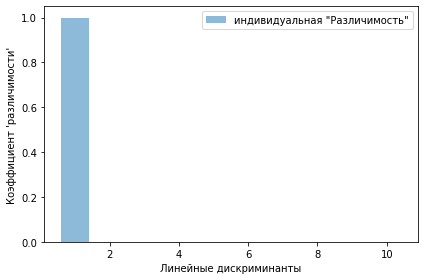

In [281]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted (eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
size = len(features)+1
plt.bar(range(1,size),discr, alpha = 0.5, align = 'center',label = 'индивидуальная "Различимость"')
plt.ylabel("Коэффициент 'различимости'")
plt.xlabel('Линейные дискриминанты')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [282]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:,np.newaxis].real))
print('Матрица W:\n',w)

Матрица W:
 [[-0.021  -0.8816]
 [ 0.342   0.0682]
 [-0.3805 -0.1942]
 [-0.3811  0.0133]
 [ 0.5238 -0.3744]
 [ 0.4768  0.1751]
 [ 0.0459  0.0043]
 [ 0.0288 -0.011 ]
 [-0.2901  0.0812]
 [ 0.0612 -0.0512]]


In [283]:
X_lda = X_std.dot(w)

<function matplotlib.pyplot.show(close=None, block=None)>

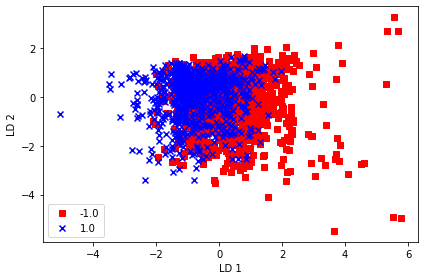

In [284]:
colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_lda[y == l, 0],X_lda[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

0.7663366336633664

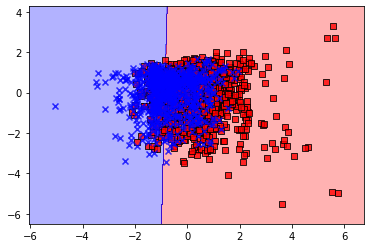

In [285]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')
ppn_test = lr.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
lr.score(X_lda,y)

0.7710891089108911

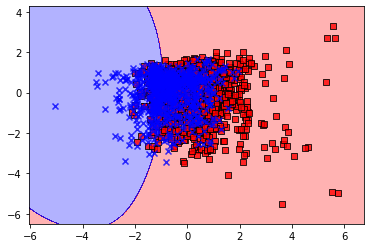

In [286]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C =1)
ppn_test = svm.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
svm.score(X_lda,y)

0.8356435643564356

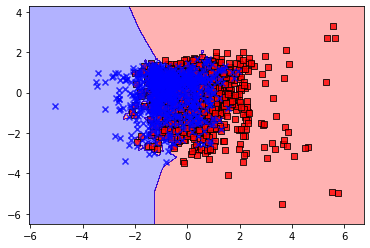

In [287]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p=2, metric = "minkowski")
ppn_test = knn.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
knn.score(X_lda,y)

MV 0: [ 0.0807  0.0327 -0.149  -0.1928  0.0566]

MV 1: [ 0.0807  0.0327 -0.149  -0.1928  0.0566]

Собственные значения в порядке убывания:

32.87343394871627
3.552713678800501e-15
1.7245027662559622e-15
1.7307797407845298e-16
1.7307797407845298e-16


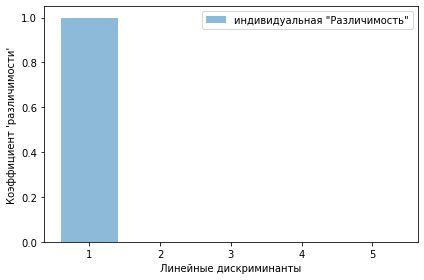

In [288]:
features = ['Age','Deck','Num','Side','route']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = df2["Transported"]
X = df2[features]
X_std = sc.fit_transform(X)

np.set_printoptions(precision = 4)
mean_vecs = []
labels = [-1.0,1.0]
for label in range(len(labels)):
    mean_vecs.append(np.mean(X_std[y == labels[label]],axis = 0))
    print('MV %s: %s\n'%(label,mean_vecs[label-1]))

d = len(features)
S_W = np.zeros((d,d))
for label , mv in zip(labels , mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_std[y == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
#print ('Матрица раcсеяния внутри классов: %sx%s'%(S_W.shape[0], S_W.shape[1]))

S_W = np.zeros((d,d))
for label,mv in zip(labels, mean_vecs):
    class_scatter = np.cov(X_std[y==label].T)
    S_W += class_scatter
#print('Масштабированная матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]) )

mean_overall = np.mean(X_std, axis= 0)
S_B = np.zeros((d,d))
for i , mean_vec in enumerate(mean_vecs):
    n = X_std[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B +=n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
#print('Матрица рассеяния между классами: %sx%s'%(S_B.shape[0],S_B.shape[1]))

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

print('Собственные значения в порядке убывания:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted (eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
size = len(features)+1
plt.bar(range(1,size),discr, alpha = 0.5, align = 'center',label = 'индивидуальная "Различимость"')
plt.ylabel("Коэффициент 'различимости'")
plt.xlabel('Линейные дискриминанты')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [289]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:,np.newaxis].real))
print('Матрица W:\n',w)

Матрица W:
 [[-0.2511 -0.9522]
 [-0.1272  0.0401]
 [ 0.5866 -0.185 ]
 [ 0.7434 -0.2345]
 [-0.1552  0.049 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

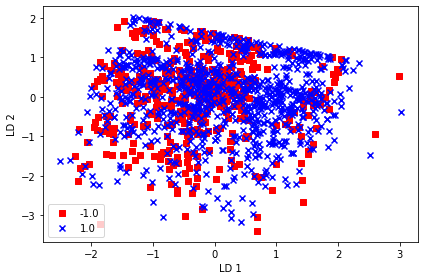

In [290]:
X_lda = X_std.dot(w)

colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_lda[y == l, 0],X_lda[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

0.8074349442379182

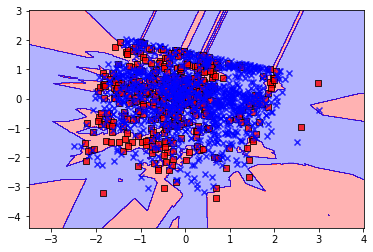

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p=2, metric = "minkowski")
ppn_test = knn.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
knn.score(X_lda,y)

0.6631970260223048

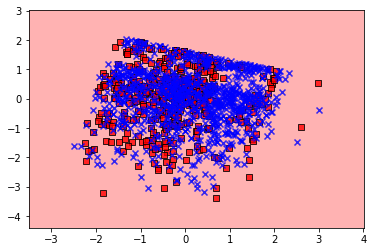

In [292]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C =1)
ppn_test = svm.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
svm.score(X_lda,y)

In [293]:
pd.value_counts(df3["Transported"])

 1.0    143
-1.0    115
Name: Transported, dtype: int64

MV 0: [ 0.1902  0.1025 -0.0784 -0.1171  0.0951]

MV 1: [ 0.1902  0.1025 -0.0784 -0.1171  0.0951]

Собственные значения в порядке убывания:

6.651319308650616
1.5457766126022139e-16
6.84763521298739e-17
1.810831347027025e-17
0.0


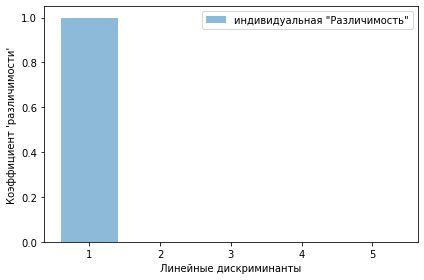

In [294]:
features = ['Age','Deck','Num','Side','route']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = df3["Transported"]
X = df3[features]
X_std = sc.fit_transform(X)

np.set_printoptions(precision = 4)
mean_vecs = []
labels = [-1.0,1.0]
for label in range(len(labels)):
    mean_vecs.append(np.mean(X_std[y == labels[label]],axis = 0))
    print('MV %s: %s\n'%(label,mean_vecs[label-1]))

d = len(features)
S_W = np.zeros((d,d))
for label , mv in zip(labels , mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_std[y == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
#print ('Матрица раcсеяния внутри классов: %sx%s'%(S_W.shape[0], S_W.shape[1]))

S_W = np.zeros((d,d))
for label,mv in zip(labels, mean_vecs):
    class_scatter = np.cov(X_std[y==label].T)
    S_W += class_scatter
#print('Масштабированная матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]) )

mean_overall = np.mean(X_std, axis= 0)
S_B = np.zeros((d,d))
for i , mean_vec in enumerate(mean_vecs):
    n = X_std[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B +=n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
#print('Матрица рассеяния между классами: %sx%s'%(S_B.shape[0],S_B.shape[1]))

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

print('Собственные значения в порядке убывания:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted (eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
size = len(features)+1
plt.bar(range(1,size),discr, alpha = 0.5, align = 'center',label = 'индивидуальная "Различимость"')
plt.ylabel("Коэффициент 'различимости'")
plt.xlabel('Линейные дискриминанты')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [295]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:,np.newaxis].real))
print('Матрица W:\n',w)

Матрица W:
 [[-0.6398  0.6503]
 [-0.4282 -0.6131]
 [ 0.3895  0.3123]
 [ 0.4506  0.3217]
 [-0.2291  0.0139]]


<function matplotlib.pyplot.show(close=None, block=None)>

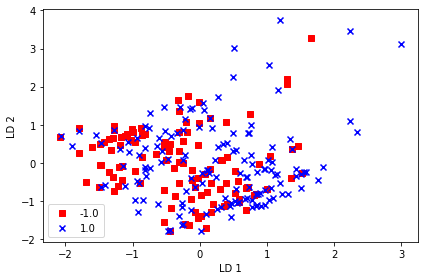

In [296]:
X_lda = X_std.dot(w)

colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_lda[y == l, 0],X_lda[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

0.6007751937984496

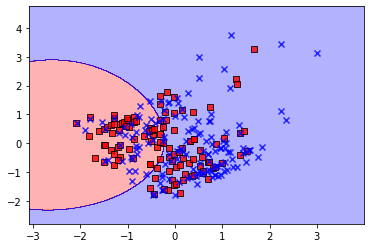

In [297]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C =1)
ppn_test = svm.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)
svm.score(X_lda,y)

In [298]:
error_percentage = 100*(0.165*2525 + 0.193*1345 + 0.115*1921 + 1519*0.04 + 103*0.01)/(3542+2525+1345)
print('Ошибок%: ',error_percentage)

Ошибок%:  12.937331354560174
